<a href="https://colab.research.google.com/github/Waikiat0323/festival/blob/main/UCCD_3073_Assg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **UCCD 3073 Assg**

In [21]:
!pip install torchviz
!pip install kaggle

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=5448441c296c2a681f2a56ce27872c205af7d5389cefd0b0531af80e0c49e630
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [22]:
#Import necessary libraries
import zipfile
import os
import random
import shutil
import zipfile
import torch
import torch.optim as optim
import torch.nn as nn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import transforms
from PIL import Image
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, f1_score, classification_report
from torchvision import models, transforms
from torchvision import models

In [23]:
#get kaggle dataset
!kaggle datasets download -d kshitij192/cars-image-dataset

Dataset URL: https://www.kaggle.com/datasets/kshitij192/cars-image-dataset
License(s): GPL-2.0
cars-image-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [24]:
current_dir = os.getcwd()
extract_dir = 'cars_image_dataset'
zip_file_path = 'cars-image-dataset.zip'
extract_path = os.path.join(current_dir, extract_dir)

# Check if the target directory exists and is empty
if not os.path.exists(extract_path) or not os.listdir(extract_path):
    # Extract all contents
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Extracted contents to {extract_path}")
else:
    print(f"Directory '{extract_path}' already exists and is not empty. Extraction skipped.")

Directory '/content/cars_image_dataset' already exists and is not empty. Extraction skipped.


In [25]:
# shutil.rmtree('/content/cars_image_dataset')

In [26]:
#get the total number items in train, test and validation set
def count_images_in_directory(directory):
    image_count = 0
    for root, dirs, files in os.walk(directory):
        image_count += len([file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])
    return image_count

# Directories for train, test, and validation sets
train_dir = os.path.join(extract_path, "Cars Dataset/train")
test_dir = os.path.join(extract_path, "Cars Dataset/test")

# Count the number of images in each set
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)

print(f'Total images in train set: {num_train_images}')
print(f'Total images in test set: {num_test_images}')


Total images in train set: 2684
Total images in test set: 813


In [27]:
# Directories
extractVali_dir = os.path.join(current_dir, extract_dir, 'Cars Dataset')
train_dir = os.path.join(extractVali_dir, 'train')
val_dir = os.path.join(extractVali_dir, 'validation')

# Debugging: Check if the directory exists and list its contents
if not os.path.exists(train_dir):
    print(f"Directory '{train_dir}' does not exist.")
    print("Listing contents of extract_dir:")
    print(os.listdir(extractVali_dir))  # List files and directories in extractVali_dir
else:
    print(f"Found train directory: {train_dir}")

# Create the validation directory if it doesn't exist
if not os.path.exists(val_dir):
    os.makedirs(val_dir)

# Set the percentage of images to move to the validation set
val_split = 0.2  # 20% of training data

# Loop through each category in the train set
for category in os.listdir(train_dir):
    category_dir = os.path.join(train_dir, category)

    # Ensure the item is a directory (category folder)
    if not os.path.isdir(category_dir):
        continue

    # Create a corresponding category directory in the validation set if it doesn't exist
    category_val_dir = os.path.join(val_dir, category)
    if not os.path.exists(category_val_dir):
        os.makedirs(category_val_dir)

    # Check if the validation directory is empty
    if len(os.listdir(category_val_dir)) == 0:
        # List all images in the category directory
        images = os.listdir(category_dir)

        # Calculate the number of images to move to the validation set
        num_val_images = int(len(images) * val_split)

        # Randomly select images for the validation set
        val_images = random.sample(images, num_val_images)

        # Move selected images to the validation directory
        for img in val_images:
            img_src = os.path.join(category_dir, img)
            img_dest = os.path.join(category_val_dir, img)

            # Move only if the file does not already exist in the validation directory
            if not os.path.exists(img_dest):
                shutil.move(img_src, img_dest)

        print(f'Moved {num_val_images} images from {category} to validation set.')
    else:
        print(f'Validation folder for category "{category}" already exists and is not empty. Skipping image movement.')


Found train directory: /content/cars_image_dataset/Cars Dataset/train
Validation folder for category "Audi" already exists and is not empty. Skipping image movement.
Validation folder for category "Rolls Royce" already exists and is not empty. Skipping image movement.
Validation folder for category "Hyundai Creta" already exists and is not empty. Skipping image movement.
Validation folder for category "Tata Safari" already exists and is not empty. Skipping image movement.
Validation folder for category "Toyota Innova" already exists and is not empty. Skipping image movement.
Validation folder for category "Swift" already exists and is not empty. Skipping image movement.
Validation folder for category "Mahindra Scorpio" already exists and is not empty. Skipping image movement.


In [28]:
#get the total number items in train, test and validation set
def count_images_in_directory(directory):
    image_count = 0
    for root, dirs, files in os.walk(directory):
        image_count += len([file for file in files if file.endswith(('.png', '.jpg', '.jpeg'))])
    return image_count

# Directories for train, test, and validation sets
train_dir = os.path.join(extract_path, "Cars Dataset/train")
test_dir = os.path.join(extract_path, "Cars Dataset/test")
val_dir = os.path.join(extract_path, "Cars Dataset/validation")

# Count the number of images in each set
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)
num_val_images = count_images_in_directory(val_dir)

print(f'Total images in train set: {num_train_images}')
print(f'Total images in test set: {num_test_images}')
print(f'Total images in validation set: {num_val_images}')


Total images in train set: 2684
Total images in test set: 813
Total images in validation set: 668


In [29]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
BATCH_SIZE = 32
NUM_EPOCHS = 5

# Helper Function

In [30]:
# def visualize_class(dataset, dataset_name, classes):
#     # Count the number of samples in each class
#     class_counts = [0] * len(classes)
#     for _, label in dataset:
#         class_counts[label] += 1

#     # Plot the distribution
#     plt.figure(figsize=(10, 5))
#     plt.bar(classes, class_counts)
#     plt.title(f'Samples Distribution for {dataset_name}')
#     plt.xlabel('Classes')
#     plt.ylabel('Number of Samples')
#     plt.xticks(rotation=45)
#     plt.show()

def visualize_class(dataset, dataset_name, classes):
    # Count the number of samples in each class
    class_counts = [0] * len(classes)
    for _, label in dataset:
        class_counts[label] += 1

    # Plot the distribution
    plt.figure(figsize=(10, 5))
    plt.bar(classes, class_counts)
    plt.title(f'Samples Distribution for {dataset_name}')
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    plt.xticks(rotation=45)
    plt.show()

# def transform_pipeline(train=True):
#     if train:
#         transform = transforms.Compose([
#             transforms.Resize(256),
#             transforms.RandomResizedCrop(224),
#             transforms.RandomHorizontalFlip(),
#             transforms.ToTensor(),
#             transforms.Normalize((0.5,), (0.5,))  # Change this line
#         ])
#     else:
#         transform = transforms.Compose([
#             transforms.Resize(256),
#             transforms.CenterCrop(224),
#             transforms.ToTensor(),
#             transforms.Normalize((0.5,), (0.5,))  # Change this line
#         ])
#     return transform

def transform_pipeline(train=True):
    if train:
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.RandomResizedCrop(224),
            transforms.RandomHorizontalFlip(),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
        ])
    else:
        transform = transforms.Compose([
            transforms.Resize(256),
            transforms.CenterCrop(224),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])  # Standard ImageNet normalization
        ])
    return transform

# def plot_history(history):
#     epochs = range(1, len(history['train_loss']) + 1)
#     plt.figure(figsize=(10, 6))

#     plt.subplot(1, 2, 1)
#     plt.plot(epochs, history['train_acc'], marker='o', label='Training Accuracy')
#     plt.plot(epochs, history['val_acc'], marker='o', label='Validation Accuracy')
#     plt.title('Training and Validation Accuracy over Epochs')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(epochs,  history['train_loss'], marker='o', label='Training loss')
#     plt.plot(epochs, history['val_loss'], marker='o', label='Validation loss')
#     plt.title('Training and Validation Loss over Epochs')
#     plt.xlabel('Epochs')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

def plot_history(history):
    epochs = range(1, len(history['train_loss']) + 1)
    plt.figure(figsize=(15, 6))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, history['train_acc'], marker='o', label='Training Accuracy')
    plt.plot(epochs, history['val_acc'], marker='o', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, history['train_loss'], marker='o', label='Training Loss')
    plt.plot(epochs, history['val_loss'], marker='o', label='Validation Loss')
    plt.title('Training and Validation Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# def train_model(model, train_loader, val_loader, num_epochs, criterion, optimizer, scheduler=None, device='cuda'):
#     history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

#     model.to(device)
#     for epoch in range(num_epochs):
#         model.train()
#         running_loss_train = 0.0
#         correct_train = 0
#         total_train = 0

#         for inputs, labels in train_loader:
#             optimizer.zero_grad()
#             inputs, labels = inputs.to(device), labels.to(device)
#             outputs = model(inputs)
#             loss = criterion(outputs, labels)
#             loss.backward()
#             optimizer.step()

#             running_loss_train += loss.item() * inputs.size(0)
#             _, predicted_train = torch.max(outputs, 1)
#             total_train += labels.size(0)
#             correct_train += (predicted_train == labels).sum().item()

#         epoch_loss = running_loss_train / len(train_loader.dataset)
#         epoch_train_accuracy = correct_train / total_train

#         if val_loader is not None:
#             model.eval()
#             running_loss_val = 0.0
#             correct_val = 0
#             total_val = 0

#             with torch.no_grad():
#                 for inputs, labels in val_loader:
#                     inputs, labels = inputs.to(device), labels.to(device)
#                     outputs = model(inputs)
#                     loss = criterion(outputs, labels)
#                     running_loss_val += loss.item() * inputs.size(0)
#                     _, predicted_val = torch.max(outputs, 1)
#                     total_val += labels.size(0)
#                     correct_val += (predicted_val == labels).sum().item()

#             epoch_val_loss = running_loss_val / len(val_loader.dataset)
#             epoch_val_accuracy = correct_val / total_val

#         if scheduler is not None:
#             scheduler.step()

#         print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_train_accuracy:.4f}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.4f}')

#         history['train_loss'].append(epoch_loss)
#         history['train_acc'].append(epoch_train_accuracy)
#         history['val_loss'].append(epoch_val_loss)
#         history['val_acc'].append(epoch_val_accuracy)

#         return history

def train_model(model, train_loader, val_loader, num_epochs, criterion, optimizer, scheduler=None, device='cuda'):
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    model.to(device)
    for epoch in range(num_epochs):
        model.train()
        running_loss_train = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            optimizer.zero_grad()
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss_train += loss.item() * inputs.size(0)
            _, predicted_train = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted_train == labels).sum().item()

        epoch_loss = running_loss_train / len(train_loader.dataset)
        epoch_train_accuracy = correct_train / total_train

        if val_loader is not None:
            model.eval()
            running_loss_val = 0.0
            correct_val = 0
            total_val = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    running_loss_val += loss.item() * inputs.size(0)
                    _, predicted_val = torch.max(outputs, 1)
                    total_val += labels.size(0)
                    correct_val += (predicted_val == labels).sum().item()

            epoch_val_loss = running_loss_val / len(val_loader.dataset)
            epoch_val_accuracy = correct_val / total_val
        else:
            epoch_val_loss = None
            epoch_val_accuracy = None

        if scheduler is not None:
            scheduler.step()

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_train_accuracy:.4f}',
              f'Validation Loss: {epoch_val_loss:.4f}' if epoch_val_loss is not None else '',
              f'Validation Accuracy: {epoch_val_accuracy:.4f}' if epoch_val_accuracy is not None else '')

        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_train_accuracy)
        history['val_loss'].append(epoch_val_loss)
        history['val_acc'].append(epoch_val_accuracy)

    return history

# def modify_network_layer(model, num_classes):
#     if isinstance(model, models.vgg.VGG):
#         model.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)
#     elif isinstance(model, models.resnet.ResNet):
#         num_ftrs = model.fc.in_features
#         model.fc = nn.Linear(num_ftrs, num_classes)
#     else:
#         raise ValueError("Unsupported model architecture")

def modify_network_layer(model, num_classes):
    if isinstance(model, models.vgg.VGG):
        model.classifier[-1] = nn.Linear(in_features=4096, out_features=num_classes)
    elif isinstance(model, models.resnet.ResNet):
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    else:
        raise ValueError("Unsupported model architecture")

In [31]:
# (Yan Jun) test train model with early stopping

class EarlyStopping:
    def __init__(self, patience=10, delta=0):
        self.patience = patience
        self.delta = delta
        self.best_loss = float('inf')
        self.counter = 0
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


def Enhancedtrain_model(model, train_loader, val_loader, num_epochs, criterion, optimizer, scheduler, device, early_stopping):
    model.to(device)
    history = {'train_loss': [], 'train_acc': [], 'val_loss': [], 'val_acc': []}

    for epoch in range(num_epochs):
        model.train()
        running_loss_train = 0.0
        correct_train = 0
        total_train = 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            batch_size = inputs.size(0)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss_train += loss.item() * batch_size
            _, predicted_train = torch.max(outputs, 1)
            total_train += batch_size
            correct_train += (predicted_train == labels).sum().item()

        epoch_loss = running_loss_train / len(train_loader.dataset)
        epoch_train_accuracy = correct_train / total_train

        # Initialize validation metrics as None
        epoch_val_loss = None
        epoch_val_accuracy = None

        if val_loader is not None:
            model.eval()
            running_loss_val = 0.0
            correct_val = 0
            total_val = 0

            with torch.no_grad():
                for inputs, labels in val_loader:
                    inputs, labels = inputs.to(device), labels.to(device)
                    batch_size = inputs.size(0)
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    running_loss_val += loss.item() * batch_size
                    _, predicted_val = torch.max(outputs, 1)
                    total_val += batch_size
                    correct_val += (predicted_val == labels).sum().item()

            epoch_val_loss = running_loss_val / len(val_loader.dataset)
            epoch_val_accuracy = correct_val / total_val

            # Check early stopping
            early_stopping(epoch_val_loss)
            if early_stopping.early_stop:
              print("Early stopping")
              break

        if scheduler is not None:
            scheduler.step(epoch_val_loss)

        # Print training and validation metrics
        if val_loader is not None:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_train_accuracy:.4f}, Validation Loss: {epoch_val_loss:.4f}, Validation Accuracy: {epoch_val_accuracy:.4f}')
        else:
            print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Training Accuracy: {epoch_train_accuracy:.4f}')

        # Append to history
        history['train_loss'].append(epoch_loss)
        history['train_acc'].append(epoch_train_accuracy)
        if val_loader is not None:
            history['val_loss'].append(epoch_val_loss)
            history['val_acc'].append(epoch_val_accuracy)

    return history


In [32]:
# (Yan Jun test)Test and evaluate the model
def evaluate_model(model, dataloader, criterion, device, class_names):
    model.eval()
    running_loss = 0.0
    correct_num = 0
    total_num = 0
    y_true = []
    y_pred = []
    y_score = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())
            y_score.extend(F.softmax(outputs, dim=1).cpu().numpy())

            total_num += labels.size(0)
            correct_num += (predicted == labels).sum().item()

    accuracy = correct_num / total_num
    loss = running_loss / len(dataloader.dataset)

    # Convert lists to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    y_score = np.array(y_score)

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    plt.figure(figsize=(8, 6))  # Adjusted size
    disp.plot(cmap='Blues')
    plt.title('Confusion Matrix')
    plt.show()

    # ROC curve
    plt.figure(figsize=(8, 6))  # Adjusted size
    for i in range(len(class_names)):
        fpr, tpr, _ = roc_curve(y_true == i, y_score[:, i])
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (area = {auc(fpr, tpr):.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc='best')
    plt.show()

    print(f'Loss: {loss:.4f}')
    print(f'Accuracy: {accuracy:.4f}')

    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

    return loss, accuracy

## Define Custom Dataset for Car image


In [33]:
# Define the class for the Car Images Dataset
class CarImagesDataset(Dataset):
    def __init__(self, root, transform=None):
        """
        Args:
        - root (str): Root directory containing the 'train' or 'test' folders.
        - transform (callable, optional): A function/transform that takes in a PIL image and returns a transformed version.
        """
        self.img_names = []  # A list containing the filenames of all samples
        self.targets = []  # A list containing labels for all samples
        self.root = root

        # Get the list of all classes (car categories)
        self.classes = [d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))]

        # Save the transformation pipeline
        self.transform = transform

        # Populate img_names and targets lists
        for i, cls in enumerate(self.classes):
            cls_folder = os.path.join(root, cls)
            samples = os.listdir(cls_folder)
            samples = [os.path.join(cls, img_name) for img_name in samples]
            self.img_names.extend(samples)
            self.targets.extend([i] * len(samples))

    def __len__(self):
        """Return the number of samples."""
        return len(self.img_names)

    def __getitem__(self, index):
        """Return a sample from the dataset."""
        img_path = os.path.join(self.root, self.img_names[index])
        image = Image.open(img_path).convert('RGB')

        # Perform transformation
        if self.transform is not None:
            image = self.transform(image)

        # Get the label
        label = self.targets[index]

        return image, label

In [34]:
TRAIN_DIR = os.path.join(extract_path, "Cars Dataset/train")
TEST_DIR = os.path.join(extract_path, "Cars Dataset/test")
VALID_DIR = os.path.join(extract_path, "Cars Dataset/validation")

In [35]:
trainset = CarImagesDataset(TRAIN_DIR, transform=None)
testset = CarImagesDataset(TEST_DIR, transform=None)
# classes = trainset.classes
trainClasses = trainset.classes
testClasses = testset.classes

print('Number of samples in dataset(train):', len(trainClasses))
print('Number of classes(train)           :', trainClasses)
print('Number of samples in dataset(test) :', len(testClasses))
print('Number of classes(test)            :', testClasses)

Number of samples in dataset(train): 7
Number of classes(train)           : ['Audi', 'Rolls Royce', 'Hyundai Creta', 'Tata Safari', 'Toyota Innova', 'Swift', 'Mahindra Scorpio']
Number of samples in dataset(test) : 7
Number of classes(test)            : ['Audi', 'Rolls Royce', 'Hyundai Creta', 'Tata Safari', 'Toyota Innova', 'Swift', 'Mahindra Scorpio']


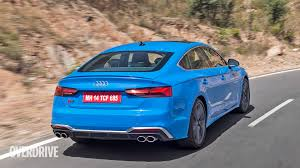

Class = Audi


In [36]:
image, label = trainset[2]
display(image)
print("Class =", trainset.classes[label])

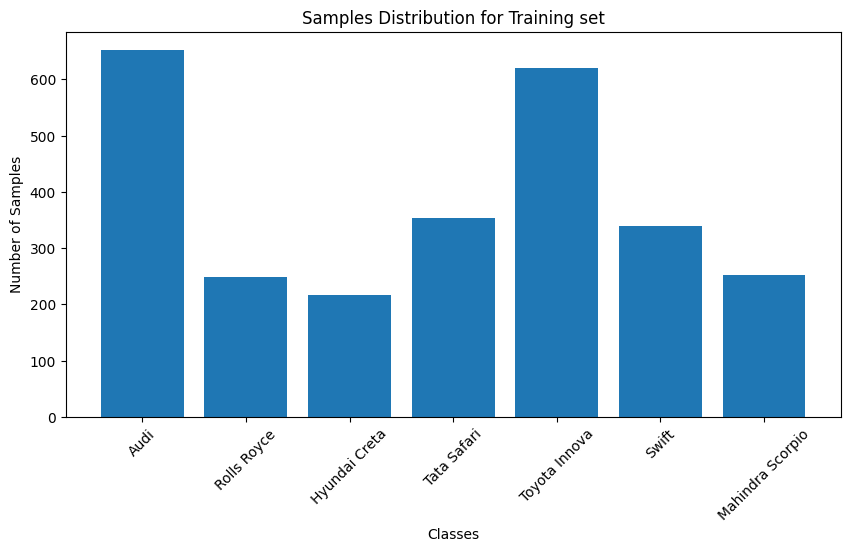

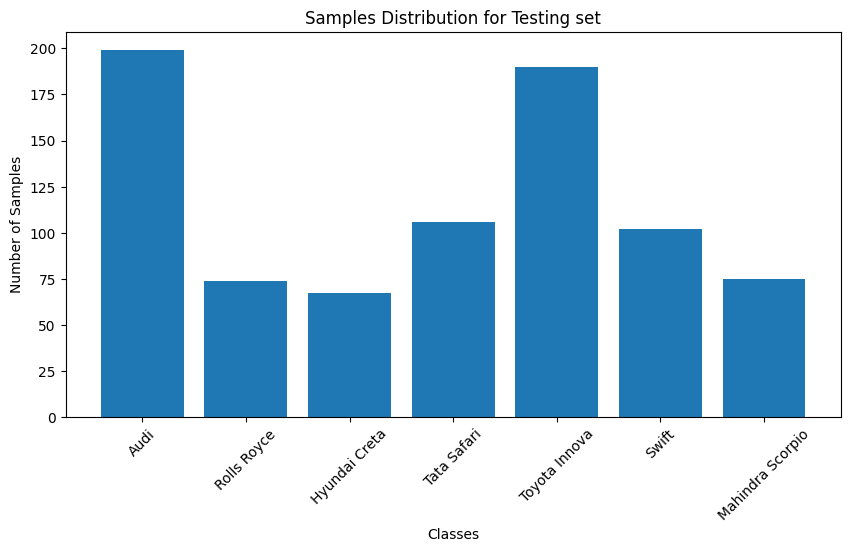

In [37]:
#Visualize the class samples distribution
visualize_class(trainset, 'Training set', trainClasses)
visualize_class(testset, 'Testing set', testClasses)

In [38]:
#Prepare dataset
trainset = CarImagesDataset(TRAIN_DIR, transform=transform_pipeline(train=True))
valset = CarImagesDataset(VALID_DIR, transform=transform_pipeline(train=False))
testset = CarImagesDataset(TEST_DIR , transform=transform_pipeline(train=False))

trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
validloader = DataLoader(valset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

x_batch, y_batch = next(iter(trainloader))
print(f'Shape of {x_batch.shape}')
print(f'Shape of {y_batch.shape}')

Shape of torch.Size([32, 3, 224, 224])
Shape of torch.Size([32])


# **VGG (Yi Mun)**

Epoch [1/5], Train Loss: 1.3127, Training Accuracy: 0.5246 Validation Loss: 0.5926 Validation Accuracy: 0.7814
Epoch [2/5], Train Loss: 0.7793, Training Accuracy: 0.7288 Validation Loss: 0.3384 Validation Accuracy: 0.8937
Epoch [3/5], Train Loss: 0.5500, Training Accuracy: 0.8130 Validation Loss: 0.2707 Validation Accuracy: 0.9162
Epoch [4/5], Train Loss: 0.4053, Training Accuracy: 0.8569 Validation Loss: 0.1774 Validation Accuracy: 0.9401
Epoch [5/5], Train Loss: 0.3667, Training Accuracy: 0.8756 Validation Loss: 0.1689 Validation Accuracy: 0.9416


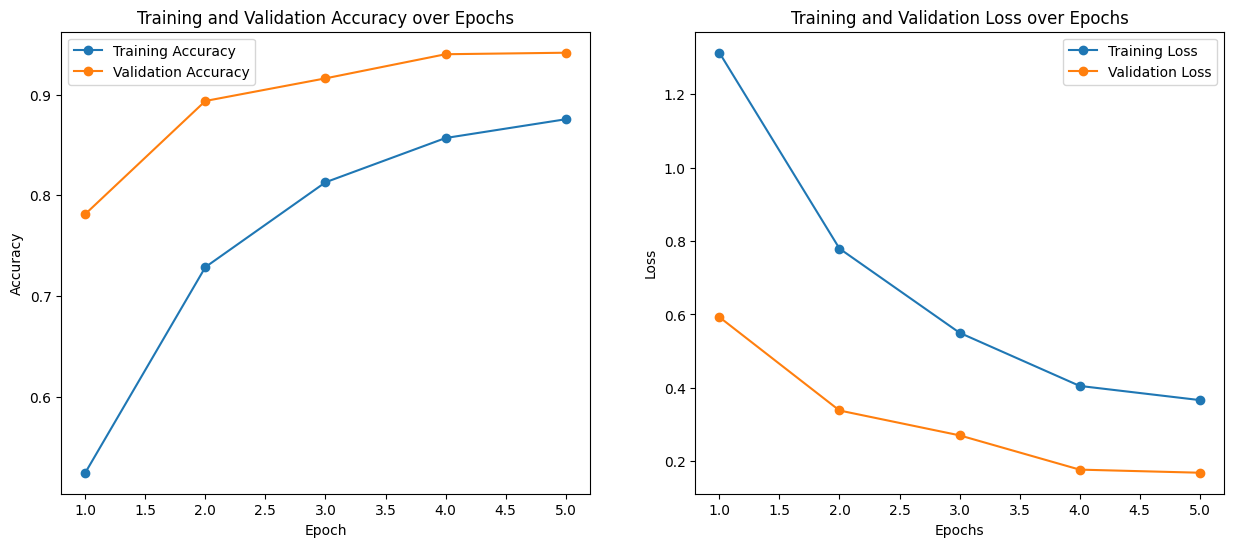

In [39]:
vgg_model = models.vgg16(pretrained=True)

modify_network_layer(vgg_model, num_classes=len(trainset.classes))

criterion = nn.CrossEntropyLoss()
optimizer_vgg = optim.SGD(vgg_model.parameters(), lr=0.001, momentum=0.9)

scheduler_vgg = StepLR(optimizer_vgg, step_size=3, gamma=0.1)

vgg_history = train_model(vgg_model, trainloader, validloader, NUM_EPOCHS, criterion, optimizer_vgg, scheduler_vgg)

plot_history(vgg_history)

# **RESNET50(Wai Kiat)**

In [ ]:
#Load the pretrained models
resnet_model = models.resnet50(pretrained=True)

modify_network_layer(resnet_model, num_classes=len(trainset.classes))

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer_resnet = optim.SGD(resnet_model.parameters(), lr=0.001, momentum=0.9)

# Define learning rate scheduler
scheduler_resnet = StepLR(optimizer_resnet, step_size=3, gamma=0.1)

# Train ResNet50 model
resnet_history = train_model(resnet_model, trainloader, validloader, NUM_EPOCHS, criterion, optimizer_resnet, scheduler_resnet)

# Plot accuracy and loss graphs for ResNet50 model
plot_history(resnet_history)

# **CNN(Yan Jun)**

In [ ]:
class CNNmodel(nn.Module):
    def __init__(self, num_classes):
        super(CNNmodel, self).__init__()

        # Convolutional Layers
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1)

        # Batch Normalization Layers
        self.bn1 = nn.BatchNorm2d(32)
        self.bn2 = nn.BatchNorm2d(64)
        self.bn3 = nn.BatchNorm2d(128)
        self.bn4 = nn.BatchNorm2d(256)

        # Pooling Layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Fully Connected Layers
        self.fc1 = nn.Linear(256 * 14 * 14, 128)
        self.fc2 = nn.Linear(128, num_classes)

        # Dropout Layer
        self.dropout = nn.Dropout(p=0.5)

    def forward(self, x):
        # Convolutional Layers with ReLU, Batch Normalization, and Pooling
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = self.pool(F.relu(self.bn3(self.conv3(x))))
        x = self.pool(F.relu(self.bn4(self.conv4(x))))


        # Flatten the tensor before passing to fully connected layers
        x = x.view(-1, 256 * 14 * 14)  # Updated here to match output shape

        # Fully Connected Layers with Dropout
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

In [ ]:
# # Instantiate the model
# num_classes = len(trainClasses)
# cnn_model = CNNmodel(num_classes=num_classes)

# # Loss function and optimizer
# cnn_criterion = nn.CrossEntropyLoss()
# cnn_optimizer = torch.optim.AdamW(cnn_model.parameters(), lr=0.0001)

# # Learning rate scheduler
# cnn_scheduler = torch.optim.lr_scheduler.StepLR(cnn_optimizer, step_size=10, gamma=0.5)

# # Early stopping
# early_stopping = EarlyStopping(patience=10, delta=0)

# # Train the model
# cnn_history = Enhancedtrain_model(
#     model=cnn_model,
#     train_loader=trainloader,
#     val_loader=testloader,
#     num_epochs=60,
#     criterion=cnn_criterion,
#     optimizer=cnn_optimizer,
#     scheduler=cnn_scheduler,
#     device='cuda' if torch.cuda.is_available() else 'cpu',
#     early_stopping=early_stopping
# )


# Fine Tuning

In [ ]:
# Define a range of learning rates to try
learning_rates = [0.001, 0.0001, 0.00001]

# Define a range of batch sizes to try
batch_sizes = [32, 64, 128]

# Define a range of epochs to try
epochs = [20, 30, 40]

# Store the best hyperparameters and performance
best_lr = None
best_batch_size = None
best_epochs = None
best_accuracy = 0.0

# Iterate over the hyperparameter combinations
for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_epochs in epochs:
            print(f"Trying lr: {lr}, batch_size: {batch_size}, epochs: {num_epochs}")

            # Prepare dataset with the current batch size
            trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
            validloader = DataLoader(valset, batch_size=batch_size, shuffle=True, num_workers=0)

            # Load the pretrained VGG16 model
            vgg_model = models.vgg16(pretrained=True)
            modify_network_layer(vgg_model, num_classes=len(trainset.classes))

            # Define loss function and optimizer with the current learning rate
            criterion = nn.CrossEntropyLoss()
            optimizer_vgg = optim.SGD(vgg_model.parameters(), lr=lr, momentum=0.9)

            # Define learning rate scheduler
            scheduler_vgg = StepLR(optimizer_vgg, step_size=3, gamma=0.1)

            # Train the model with the current hyperparameters
            vgg_history = train_model(vgg_model, trainloader, validloader, num_epochs, criterion, optimizer_vgg, scheduler_vgg)

            # Get the final validation accuracy
            final_accuracy = vgg_history['val_acc'][-1]

            # Check if this combination gives the best accuracy
            if final_accuracy > best_accuracy:
                best_lr = lr
                best_batch_size = batch_size
                best_epochs = num_epochs
                best_accuracy = final_accuracy

# Print the best hyperparameters
print(f"Best learning rate: {best_lr}")
print(f"Best batch size: {best_batch_size}")
print(f"Best number of epochs: {best_epochs}")


In [ ]:
# Define a range of learning rates to try
learning_rates = [0.001, 0.0001, 0.00001]

# Define a range of batch sizes to try
batch_sizes = [32, 64, 128]

# Define a range of epochs to try
epochs = [20, 30, 40]

# Store the best hyperparameters and performance
best_lr = None
best_batch_size = None
best_epochs = None
best_accuracy = 0.0

# Iterate over the hyperparameter combinations
for lr in learning_rates:
    for batch_size in batch_sizes:
        for num_epochs in epochs:
            print(f"Trying lr: {lr}, batch_size: {batch_size}, epochs: {num_epochs}")

            # Prepare dataset with the current batch size
            trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
            validloader = DataLoader(valset, batch_size=batch_size, shuffle=True, num_workers=0)

            # Load the pretrained ResNet50 model
            resnet_model = models.resnet50(pretrained=True)
            modify_network_layer(resnet_model, num_classes=len(trainset.classes))

            # Define loss function and optimizer with the current learning rate
            criterion = nn.CrossEntropyLoss()
            optimizer_resnet = optim.SGD(resnet_model.parameters(), lr=lr, momentum=0.9)

            # Define learning rate scheduler
            scheduler_resnet = StepLR(optimizer_resnet, step_size=3, gamma=0.1)

            # Train the model with the current hyperparameters
            resnet_history = train_model(resnet_model, trainloader, validloader, num_epochs, criterion, optimizer_resnet, scheduler_resnet)

            # Get the final validation accuracy
            final_accuracy = resnet_history['val_acc'][-1]

            # Check if this combination gives the best accuracy
            if final_accuracy > best_accuracy:
                best_lr = lr
                best_batch_size = batch_size
                best_epochs = num_epochs
                best_accuracy = final_accuracy

# Print the best hyperparameters
print(f"Best learning rate: {best_lr}")
print(f"Best batch size: {best_batch_size}")
print(f"Best number of epochs: {best_epochs}")


In [ ]:
# Define a range of learning rates to try
learning_rates = [0.001, 0.0001, 0.00001]

# Define a range of batch sizes to try
batch_sizes = [32, 64, 128]

# Define a range of epochs to try
epochs = [20, 30, 40]

# Store the best hyperparameters and performance
best_lr = None
best_batch_size = None
best_epochs = None
best_accuracy = 0.0

# Iterate over the hyperparameter combinations
for lr in learning_rates:
  for batch_size in batch_sizes:
    for num_epochs in epochs:
      print(f"Trying lr: {lr}, batch_size: {batch_size}, epochs: {num_epochs}")

      # Prepare dataset with the current batch size
      trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
      validloader = DataLoader(valset, batch_size=batch_size, shuffle=True, num_workers=0)

      # Instantiate the model
      num_classes = len(trainClasses)
      cnn_model = CNNmodel(num_classes=num_classes)

      # Loss function and optimizer
      cnn_criterion = nn.CrossEntropyLoss()
      cnn_optimizer = torch.optim.AdamW(cnn_model.parameters(), lr=lr)

      # Learning rate scheduler
      cnn_scheduler = torch.optim.lr_scheduler.StepLR(cnn_optimizer, step_size=10, gamma=0.5)

      # Early stopping
      early_stopping = EarlyStopping(patience=10, delta=0)

      # Train the model
      cnn_history = Enhancedtrain_model(
          model=cnn_model,
          train_loader=trainloader,
          val_loader=validloader,
          num_epochs=num_epochs,
          criterion=cnn_criterion,
          optimizer=cnn_optimizer,
          scheduler=cnn_scheduler,
          device='cuda' if torch.cuda.is_available() else 'cpu',
          early_stopping=early_stopping
      )

      # Get the final validation accuracy
      final_accuracy = cnn_history['val_acc'][-1]

      # Check if this combination gives the best accuracy
      if final_accuracy > best_accuracy:
          best_lr = lr
          best_batch_size = batch_size
          best_epochs = num_epochs
          best_accuracy = final_accuracy

# Print the best hyperparameters
print(f"Best learning rate: {best_lr}")
print(f"Best batch size: {best_batch_size}")
print(f"Best number of epochs: {best_epochs}")

# Evaluate and Comparison Analysis


In [ ]:
# Evaluate CNN model on the test set
evaluate_model(cnn_model, testloader, cnn_criterion, DEVICE, class_names=testClasses)


In [ ]:
# Evaluate VGG model on the test set
evaluate_model(vgg_model, testloader, criterion, DEVICE, class_names=testClasses)


In [ ]:

# Evaluate resnet model on the test set
evaluate_model(resnet_model, testloader, criterion, DEVICE, class_names=testClasses)

In [ ]:

# Function to make predictions and get confidence
def predict(model, image, device='cuda'):
    model.eval()
    class_names = trainClasses
    with torch.no_grad():
        image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
        output = model(image)
        probabilities = torch.softmax(output, dim=1)  # Convert logits to probabilities
        confidence, predicted_class = torch.max(probabilities, 1)
        return class_names[predicted_class.item()], confidence.item() * 100  # Return class and confidence in percentage

# Sample visualization from the test set
def plot_predictions(test_loader, model, class_names, device='cuda'):
    plt.figure(figsize=(10, 10))
    model.to(device)

    # Iterate through the test loader
    for images, labels in test_loader:
        # Convert images and labels to CPU for visualization
        images = images.cpu()
        labels = labels.cpu()

        for i in range(min(len(images), 9)):  # Show up to 9 images
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(np.transpose(images[i].numpy(), (1, 2, 0)))  # Convert CHW to HWC for plotting

            predicted_class, confidence = predict(model, images[i], device)
            actual_class = class_names[int(labels[i])]

            plt.title(f"Actual: {actual_class},\nPredicted: {predicted_class}\nConfidence: {confidence:.2f}%")
            plt.axis("off")

        break  # Only show the first batch

    plt.tight_layout()
    plt.show()

# Assuming test_loader is your DataLoader for the test set
plot_predictions(testloader, cnn_model, testClasses, DEVICE)
